<span style="color:#8DB6CD; font-size:30px">**Datos de Gamma ray**</span>
***



<span style="color:#FFB3A7; font-size:20px">**Índice**</span>
 ***
- [Cargando la información del sondeo](#cargando-la-informacion-del-sondeo)
- [Procesar datos (validación)](#procesar-datos-validacion)
- [Generar gráfico](#generar-grafico)
- [Generar gráfico con litología](#generar-grafico-con-litologia)
- [Código completo](#codigo-completo)


### <a id="cargando-la-informacion-del-sondeo"></a> <span style="color:#FFB3A7; font-size:20px"> **Cargando la información del sondeo** </span>
***
En este notebook, usaremos el archivo `C_I34_Gammaray.txt` que cuenta con datos de profundidad y Gamma Ray.

Primero, importaremos las librerías:

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator
from matplotlib.patches import Patch

Cargamos el archivo y creamos un DataFrame:

In [187]:
# Cargamos  datos desde el archivo TXT
data = pd.read_csv("datos_txt/C_I34_Gammaray.txt", delim_whitespace=True, encoding="utf-8")

# Ahora puedes trabajar con el DataFrame 'data'
print(data.head()) # Muestra las primeras filas para verificar

  Depth     NGAM
0     m      API
1  5.02  34.6667
2  5.07  33.7838
3  5.12  34.6667
4  5.17  26.6667


C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\1946960871.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("datos_txt/C_I34_Gammaray.txt", delim_whitespace=True, encoding="utf-8")


Mostramos la información:

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902 entries, 0 to 2901
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Depth   2902 non-null   object
 1   NGAM    2902 non-null   object
dtypes: object(2)
memory usage: 45.5+ KB


### <a id="procesar-datos-validacion"></a> <span style="color:#FFB3A7; font-size:20px"> **Procesar datos (validación)** </span>
***

Ahora procesamos los datos eliminando las unidades de cada columna y convirtiéndolos a formato numérico para que sean más fáciles de manejar.

In [189]:
data = data.iloc[1:].copy()  # Eliminar la fila de unidades en los datos de temperatura
data = data.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos
data.head() # Muestra las primeras filas para verificar

C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\4088095860.py:2: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos


,Depth,NGAM
1,5.02,34.6667
2,5.07,33.7838
3,5.12,34.6667
4,5.17,26.6667
5,5.22,40.0000


In [190]:
# Ver si hay valores negativos en la columna
(data['NGAM'] < 0).any()

np.True_

In [191]:
# verificamos cuantos valores negativos hay
(data['NGAM'] < 0).sum()

np.int64(48)

In [192]:
# remplazamos los valores negativos con NaN
data['NGAM'] = data['NGAM'].mask(data['NGAM'] < 0, np.nan) 

In [193]:
# verificamos que no haya valores negativos
(data['NGAM'] < 0).sum()

np.int64(0)

In [194]:
#verificamos que el tipo de dato sea numéricos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2901 entries, 1 to 2901
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Depth   2901 non-null   float64
 1   NGAM    2853 non-null   float64
dtypes: float64(2)
memory usage: 45.5 KB


In [195]:
# Para tener una curva continua rellenanamos los NaN con interpolación 
data["NGAM_interp"] = data["NGAM"].interpolate(method="linear")  # Interpolación lineal

### <a id="generar-grafico"></a> <span style="color:#FFB3A7; font-size:20px"> **Generar Gráfico** </span>
***

In [196]:
# Suavizar gamma con un filtro de media móvil de 20 metros
gamma_suavizado = data["NGAM_interp"].rolling(window=20, center=True).mean()


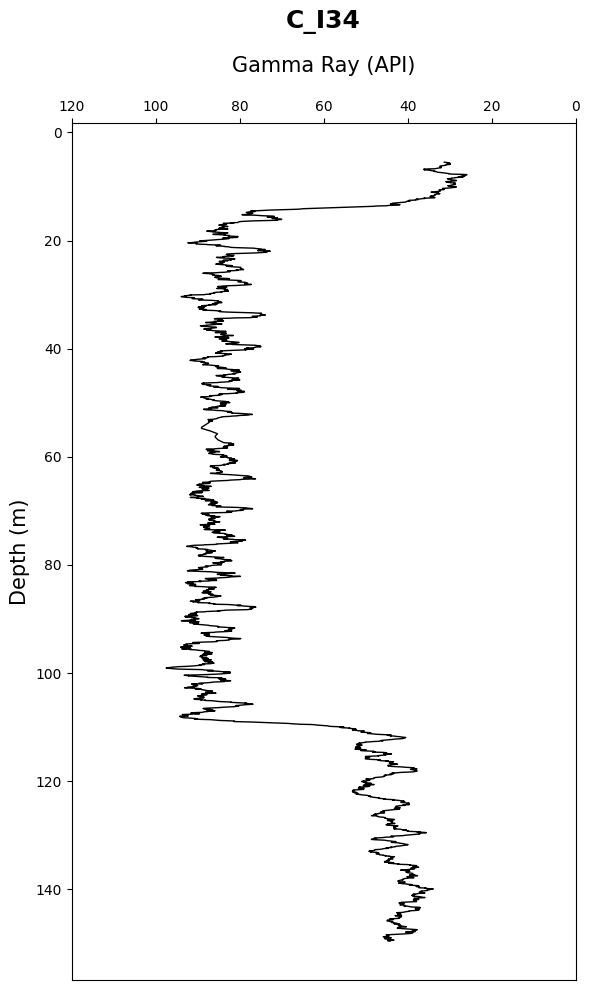

In [ ]:

# Figura principal
fig, ax = plt.subplots(figsize=(6, 10))

# Graficar la curva de gamma suavizada
ax.plot(gamma_suavizado, data["Depth"], linewidth=1, c="black")

# Configuración de los ejes
ax.set_xlabel('Gamma Ray (API)', fontsize=15, labelpad=20)  # Aumenta separación con labelpad
ax.set_ylabel('Depth (m)', fontsize=15)
ax.set_xlim(120, 0)  # Rango de gamma
ax.invert_yaxis()  # Invertir eje Y para que 0m esté arriba
ax.tick_params(axis='both', which='major', labelsize=10) # Tamaño de las etiquetas de los ejes
ax.tick_params(axis='both', which='minor', labelsize=8) # Tamaño de las etiquetas de los ejes secundarios
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top") 

# Agregar título
ax.set_title('C_I34', fontsize=18, fontweight='bold', pad=20)

# Ajustar el diseño para que no se solapen los elementos
plt.tight_layout()

# Exportar la figura como PNG y PDF
#plt.savefig(f"datos_png_pdf/C_I34_Gammaray.png", dpi=300)
#plt.savefig(f"datos_png_pdf/C_I34_Gammaray.pdf", format='pdf')

# Mostrar la figura
plt.show()

### <a id="generar-grafico-con-litologia"></a> <span style="color:#FFB3A7; font-size:20px"> **Generar Gráfico con litología** </span>
***

In [198]:
# Cargamos  datos de litologías desde el archivo TXT
data_lito = pd.read_csv("datos_txt/C_I34_Litologia.txt", delim_whitespace=True, encoding="utf-8")

# Ahora puedes trabajar con el DataFrame 'data'
print(data_lito.head()) # Muestra las primeras filas para verificar
data_lito.info()

  TopDepth BottomDepth  LithoCode
0        m           m        NaN
1     0.00       17.00        3.0
2    17.00       72.00        4.0
3    72.00       84.00        5.0
4    84.10      110.00        4.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TopDepth     6 non-null      object 
 1   BottomDepth  6 non-null      object 
 2   LithoCode    5 non-null      float64
dtypes: float64(1), object(2)
memory usage: 276.0+ bytes


C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\2433710126.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_lito = pd.read_csv("datos_txt/C_I34_Litologia.txt", delim_whitespace=True, encoding="utf-8")


In [199]:
# Preprocesamos los Datos de Litología

data_lito = data_lito.iloc[1:].copy()  # Eliminar la fila de unidades en los datos
data_lito = data_lito.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos

col_dict_data_lito = {"TopDepth": "Top", "BottomDepth": "Bottom", "LithoCode": "Lito"} #dicionario para las columnas
data_lito.rename(columns=col_dict_data_lito, inplace=True)  # Renombrar columnas

print(data_lito.head()) # Muestra las primeras filas para verificar 
data_lito.info() #verificamos que el tipo de dato sea numéricos.

     Top  Bottom  Lito
1    0.0    17.0   3.0
2   17.0    72.0   4.0
3   72.0    84.0   5.0
4   84.1   110.0   4.0
5  110.0   150.0   6.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 1 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Top     5 non-null      float64
 1   Bottom  5 non-null      float64
 2   Lito    5 non-null      float64
dtypes: float64(3)
memory usage: 252.0 bytes


C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\336662467.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data_lito = data_lito.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos


In [200]:
# Diccionario de litologías y colores
litologias = {
    1: {'Nombre_litologia': 'Non-sampled section', 'Color': '#000000'},
    2: {'Nombre_litologia': 'Sands', 'Color': '#FFE4B5'},
    3: {'Nombre_litologia': 'Pumice', 'Color': '#FFE4E1'},
    4: {'Nombre_litologia': 'Phonolitic lava flows', 'Color': '#8FBC8F'},
    5: {'Nombre_litologia': 'Phonolitic mafic lava flows', 'Color': '#556B2F'},
    6: {'Nombre_litologia': 'Trachybasalts', 'Color': '#BC8F8F'}
}

# Asignar código de litología a cada fila en `data`
def asignar_litologia(profundidad):
    fila = data_lito[(data_lito["Top"] <= profundidad) & (data_lito["Bottom"] > profundidad)]
    return fila["Lito"].values[0] if not fila.empty else np.nan

data["Lito"] = data["Depth"].apply(asignar_litologia)
data["Color_Lito"] = data["Lito"].map(lambda x: litologias.get(x, {'Color': '#FFFFFF'})['Color'])

# Mostrar una muestra del DataFrame final
print(data.head())

   Depth     NGAM  NGAM_interp  Lito Color_Lito
1   5.02  34.6667      34.6667   3.0    #FFE4E1
2   5.07  33.7838      33.7838   3.0    #FFE4E1
3   5.12  34.6667      34.6667   3.0    #FFE4E1
4   5.17  26.6667      26.6667   3.0    #FFE4E1
5   5.22  40.0000      40.0000   3.0    #FFE4E1


Gráfico:

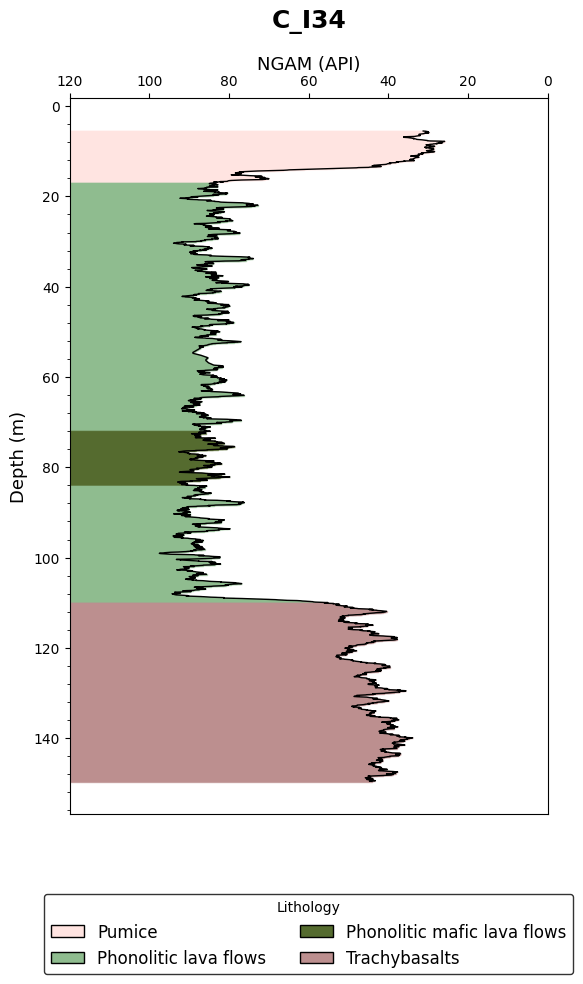

In [ ]:
# Graficar NGAM y litología
fig, ax = plt.subplots(figsize=(6, 10))

# Graficar la curva de NGAM suavizada
ax.plot(gamma_suavizado, data["Depth"], color='black', linewidth=1, label='NGAM (API)')

# Rellenar la litología con colores
for i in range(len(data) - 1):  # Recorre las filas del DataFrame 'data'
    if not np.isnan(data["Lito"].iloc[i]):  # Verifica si el valor en la columna "Lito" no es NaN (No disponible)
        color = data["Color_Lito"].iloc[i]  # Asigna el color correspondiente desde la columna "Color_Lito"
        ax.fill_betweenx([data["Depth"].iloc[i], data["Depth"].iloc[i + 1]],  # Rellena entre las profundidades actuales
                         gamma_suavizado.iloc[i],  # Límite izquierdo (valor gamma suavizado)
                         120,  # Límite derecho en el gráfico (valor 120 API, posiblemente para una escala de gamma)
                         color=color, alpha=0.6)  # Aplica el color con un nivel de opacidad (alpha)

# Configurar ejes
ax.set_xlabel("NGAM (API)", fontsize=13)
ax.set_ylabel("Depth (m)", fontsize=13)
ax.invert_yaxis()  # Invertir el eje Y para que la profundidad aumente hacia abajo
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
ax.set_xlim(120, 0)  # Invertir el eje X (NGAM)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Crear la leyenda de litologías
lit_patches = [Patch(facecolor=lit['Color'], edgecolor='black', label=lit['Nombre_litologia']) 
               for lit_code, lit in litologias.items() if lit_code in data["Lito"].unique()]

legend = plt.legend(handles=lit_patches, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
                    ncol=2, fontsize=12, title="Lithology")
legend.get_frame().set_edgecolor('black')

# Agregar título
ax.set_title('C_I34', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()

# Guardar la figura
#plt.savefig(f"datos_png_pdf/C_I34_Gamma_Litologia.png", dpi=300, bbox_inches="tight")
#plt.savefig(f"datos_png_pdf/C_I34_Gamma_Litologia.pdf", format="pdf", bbox_inches="tight")

plt.show()

### <a id="codigo-completo"></a> <span style="color:#FFB3A7; font-size:20px"> **Código completo** </span>
***

Código completo de la curva de GammaRay con litologia mostrado paso a paso en este notebook: 

C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\3549151167.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("datos_txt/C_I34_Gammaray.txt", delim_whitespace=True, encoding="utf-8")
C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\3549151167.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos
C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\3549151167.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_lito = pd.read_csv("datos_txt/C_I34_Litologia.txt", delim_whitespace=True, encoding="utf-8")
C:\Users\jmorales\AppData\Local\Temp\ipykernel_19008\3549151167.py

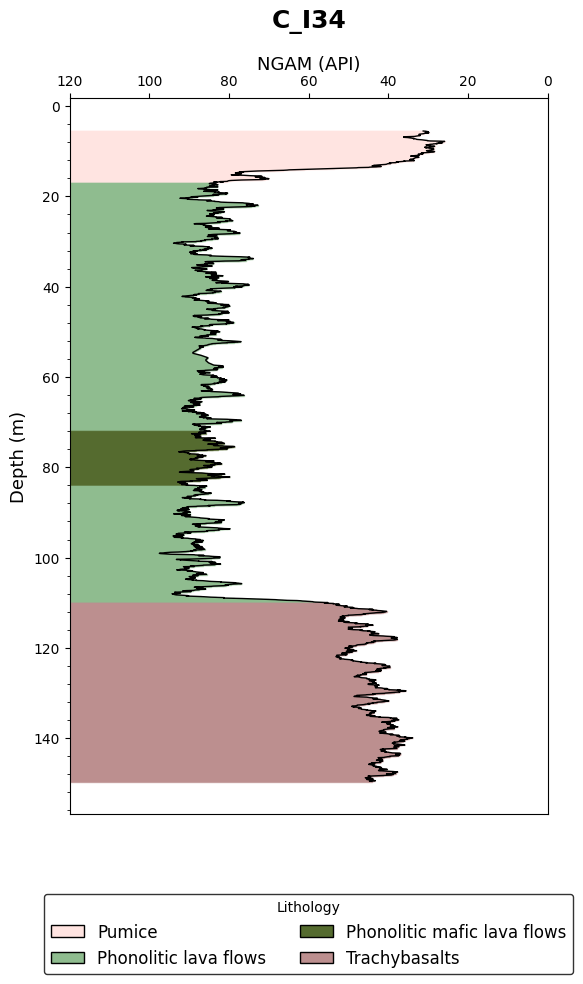

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, MaxNLocator

# Cargar datos de Gamma Ray
data = pd.read_csv("datos_txt/C_I34_Gammaray.txt", delim_whitespace=True, encoding="utf-8")
data = data.iloc[1:].copy()  # Eliminar la fila de unidades en los datos de temperatura
data = data.apply(pd.to_numeric, errors='ignore')  # Convertir datos a numéricos
data['NGAM'] = data['NGAM'].mask(data['NGAM'] < 0, np.nan)  # Reemplazar valores negativos con NaN

# Cargar datos de Litología
data_lito = pd.read_csv("datos_txt/C_I34_Litologia.txt", delim_whitespace=True, encoding="utf-8")
col_dict_data_lito = {"TopDepth": "Top", "BottomDepth": "Bottom", "LithoCode": "Lito"}  # Diccionario para renombrar columnas
data_lito = data_lito.iloc[1:].copy()
data_lito = data_lito.apply(pd.to_numeric, errors='ignore')
data_lito.rename(columns=col_dict_data_lito, inplace=True)

# Interpolación y suavizado de NGAM
data["NGAM_interp"] = data["NGAM"].interpolate(method="linear")
data["NGAM_suavizado"] = data["NGAM_interp"].rolling(window=20, center=True).mean()

# Diccionario de litologías y colores
litologias = {
    1: {'Nombre_litologia': 'Non-sampled section', 'Color': '#000000'},
    2: {'Nombre_litologia': 'Sands', 'Color': '#FFE4B5'},
    3: {'Nombre_litologia': 'Pumice', 'Color': '#FFE4E1'},
    4: {'Nombre_litologia': 'Phonolitic lava flows', 'Color': '#8FBC8F'},
    5: {'Nombre_litologia': 'Phonolitic mafic lava flows', 'Color': '#556B2F'},
    6: {'Nombre_litologia': 'Trachybasalts', 'Color': '#BC8F8F'}
}

# Asignar código de litología a cada fila en `data`
def asignar_litologia(profundidad):
    fila = data_lito[(data_lito["Top"] <= profundidad) & (data_lito["Bottom"] > profundidad)]
    return fila["Lito"].values[0] if not fila.empty else np.nan

data["Lito"] = data["Depth"].apply(asignar_litologia)
data["Color_Lito"] = data["Lito"].map(lambda x: litologias.get(x, {'Color': '#FFFFFF'})['Color'])

# Graficar NGAM y litología
fig, ax = plt.subplots(figsize=(6, 10))

# Graficar la curva de NGAM suavizada
ax.plot(data["NGAM_suavizado"], data["Depth"], color='black', linewidth=1, label='NGAM (API)')

# Rellenar la litología con colores
for i in range(len(data) - 1):
    if not np.isnan(data["Lito"].iloc[i]):
        color = data["Color_Lito"].iloc[i]
        ax.fill_betweenx([data["Depth"].iloc[i], data["Depth"].iloc[i + 1]], 
                         data["NGAM_suavizado"].iloc[i], 
                         120,  # Límite del gamma en API
                         color=color, alpha=0.6)

# Configurar ejes
ax.set_xlabel("NGAM (API)", fontsize=13)
ax.set_ylabel("Depth (m)", fontsize=13)
ax.invert_yaxis()  # Invertir el eje Y para que la profundidad aumente hacia abajo
ax.xaxis.set_label_position("top")
ax.xaxis.set_ticks_position("top")
ax.set_xlim(120, 0)  # Invertir el eje X (NGAM)
ax.yaxis.set_major_locator(MultipleLocator(20))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))

# Crear la leyenda de litologías
lit_patches = [Patch(facecolor=lit['Color'], edgecolor='black', label=lit['Nombre_litologia']) 
               for lit_code, lit in litologias.items() if lit_code in data["Lito"].unique()]

legend = plt.legend(handles=lit_patches, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
                    ncol=2, fontsize=12, title="Lithology")
legend.get_frame().set_edgecolor('black')

# Agregar título
ax.set_title('C_I34', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()

# Guardar la figura
#plt.savefig(f"datos_png_pdf/C_I34_Gamma_Litologia.png", dpi=300, bbox_inches="tight")
#plt.savefig(f"datos_png_pdf/C_I34_Gamma_Litologia.pdf", format="pdf", bbox_inches="tight")

plt.show()
